In [28]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

from glob import glob
    
%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version  -  1.20.1
pandas version -  1.2.4
w


[실습01]
- 지역으로 시작하는 모든 파일을 로드하고 병합

In [29]:
files = glob('C:/Users/82102/MachineLearning/Visualization/data/data (2)/지역*.xls')
temp_raw = []

for file in files :
    temp = pd.read_excel(file, header = 2)
    temp_raw.append(temp)
temp_raw

[       지역                   상호                          주소      상표  \
 0   서울특별시               오렌지주유소        서울 강동구 성안로 102 (성내동)   SK에너지   
 1   서울특별시               구천면주유소       서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 2   서울특별시       GS칼텍스㈜직영 신월주유소      서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 3   서울특별시                광성주유소       서울 강동구 올림픽로 673 (천호동)   S-OIL   
 4   서울특별시  (주)소모에너지엔테크놀러지성내주유소       서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 5   서울특별시      (주)퍼스트오일 코알라주유소   서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 6   서울특별시         알이디씨(주)천동주유소   서울특별시 강동구  천호대로 987 (천호동)  현대오일뱅크   
 7   서울특별시             sk해뜨는주유소    서울특별시 강동구  상일로 132 (강일동)   SK에너지   
 8   서울특별시       대성석유(주)직영길동주유소      서울 강동구 천호대로 1168 (둔촌동)   GS칼텍스   
 9   서울특별시              방아다리주유소        서울 강동구 동남로 811 (명일동)   SK에너지   
 10  서울특별시   SK네트웍스㈜암사주유소(self)       서울 강동구 올림픽로 749 (암사동)   SK에너지   
 11  서울특별시       (주)삼표에너지 고덕주유소         서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 12  서울특별시   CJ대한통운(주)직영 천호점주유소         서울 강동구 천중로 67 (천호동)  현대오일뱅크   
 13  서

In [30]:
oil_station_df = pd.concat(temp_raw)
oil_station_df

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1554,1354,997
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1355,-
2,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1855,1559,1349,1000
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1578,1388,1100
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1588,1388,-
...,...,...,...,...,...,...,...,...,...,...
15,서울특별시,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),GS칼텍스,02-905-4441,N,-,1548,1329,-
16,서울특별시,도담주유소,서울특별시 도봉구 도봉로 941 (도봉동),SK에너지,02-3491-5577,N,-,1559,1345,-
17,서울특별시,제일주유소,서울 도봉구 해등로3길 86 (창동),S-OIL,02-996-8790,N,-,1598,1398,-
18,서울특별시,sk네트웍스 영신주유소,서울특별시 도봉구 방학로 151 (방학동 671-2),SK에너지,02-956-5152,N,-,1639,1429,963


실습[02]
기본정보 확인 및 결측치 확인

In [31]:
oil_station_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 19
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      491 non-null    object
 1   상호      491 non-null    object
 2   주소      491 non-null    object
 3   상표      491 non-null    object
 4   전화번호    491 non-null    object
 5   셀프여부    491 non-null    object
 6   고급휘발유   491 non-null    object
 7   휘발유     491 non-null    object
 8   경유      491 non-null    object
 9   실내등유    491 non-null    object
dtypes: object(10)
memory usage: 42.2+ KB


In [32]:
oil_station_df.isnull().sum()

지역       0
상호       0
주소       0
상표       0
전화번호     0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

실습[03]
- 휘발유를 대상으로 분석 진행하기위해서 컬럼명 변경하여 서브셋 만들기
- 상호,       주소,     휘발유, 셀프여부 , 상표
- oil_store , address , price , self_y_n , company

In [33]:
subset = oil_station_df.rename(columns = {'상호':'oil_store', '주소':'address', '휘발유':'price', 
                                         '셀프여부':'self_y_n','상표':'company'})

In [34]:
subset = subset[['oil_store' , 'address' , 'price' , 'self_y_n' , 'company']]
subset

,oil_store,address,price,self_y_n,company
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스
...,...,...,...,...,...
15,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1548,N,GS칼텍스
16,도담주유소,서울특별시 도봉구 도봉로 941 (도봉동),1559,N,SK에너지
17,제일주유소,서울 도봉구 해등로3길 86 (창동),1598,N,S-OIL
18,sk네트웍스 영신주유소,서울특별시 도봉구 방학로 151 (방학동 671-2),1639,N,SK에너지


실습[04]
- 구별 주유소 가격을 조사하기 위해서 파생변수 생성(direct)
- 구별 정보확인
- 서울특별시 => 성동구 대체
- 특별시 => 도봉구 대체

In [35]:
subset['direct'] = subset['address'].str.split(" ", expand = True)[1]

In [36]:
subset.loc[subset['direct'] == '서울특별시', 'direct'] = '성동구'
subset.loc[subset['direct'] == '특별시', 'direct'] = '도봉구'

In [37]:
subset.direct.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구'], dtype=object)

실습[05]
- 가격 정보 확인
- 가격 정보가 기입되지 않은 주유소 제거
- 컬럼 타입을 숫자형으로 변경

In [38]:
subset[subset['price'] == '-']

,oil_store,address,price,self_y_n,company,direct
18,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스,강동구
33,하나주유소,서울특별시 영등포구 도림로 236 (신길동),-,N,S-OIL,영등포구
12,(주)에이앤이청담주유소,서울특별시 강북구 도봉로 155 (미아동),-,Y,SK에너지,강북구
13,송정주유소,서울특별시 강북구 인수봉로 185 (수유동),-,N,자가상표,강북구


In [39]:
subset.drop([18,33,12,13], inplace=True)

In [40]:
# drop 확인
subset[subset['price'] == '-']

,oil_store,address,price,self_y_n,company,direct


In [41]:
subset = subset.astype({'price': 'int'})

In [42]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   oil_store  435 non-null    object
 1   address    435 non-null    object
 2   price      435 non-null    int32 
 3   self_y_n   435 non-null    object
 4   company    435 non-null    object
 5   direct     435 non-null    object
dtypes: int32(1), object(5)
memory usage: 22.1+ KB


실습[06]
- 인덱스를 새롭게 정의
- 인덱스 열 제거

In [54]:
subset.reset_index
subset

,oil_store,address,price,self_y_n,company,direct
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
14,우이동주유소,서울 도봉구 삼양로 630 (쌍문동),1539,N,S-OIL,도봉구
15,대성산업(주)신창주유소,서울 도봉구 덕릉로 267 (창동),1548,N,GS칼텍스,도봉구
16,도담주유소,서울특별시 도봉구 도봉로 941 (도봉동),1559,N,SK에너지,도봉구
17,제일주유소,서울 도봉구 해등로3길 86 (창동),1598,N,S-OIL,도봉구


실습[07]
- 박스플롯을 이용한 셀프여부 비교 시각화(휘발유 가격차이 확인)
- 회사 및 구별 휘발유 평균가격 확인

<AxesSubplot:xlabel='self_y_n', ylabel='price'>

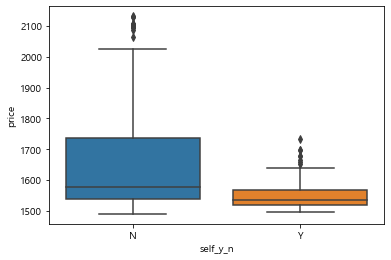

In [92]:
# 박스플롯을 이용한 셀프여부별 휘발유 가격 비교 시각화
sns.boxplot(data =subset, x = 'self_y_n',  y = 'price')

실습[08]
- 구별 휘발유 평균가격 확인

In [96]:

subset.groupby('direct')['price'].mean()

direct
강동구     1649.437500
강북구     1534.333333
강서구     1571.129032
관악구     1603.687500
광진구     1565.750000
구로구     1595.526316
금천구     1578.000000
노원구     1597.857143
도봉구     1554.125000
동대문구    1573.315789
동작구     1549.833333
마포구     1679.083333
서대문구    1591.333333
서초구     1645.342105
성동구     1613.947368
성북구     1576.150000
송파구     1611.300000
양천구     1602.782609
영등포구    1661.655172
용산구     1923.571429
은평구     1536.000000
종로구     1941.777778
중구      1964.083333
중랑구     1535.375000
Name: price, dtype: float64